In [1]:
import numpy as np 
import pandas as pd
from datetime import datetime

import pandas as pd
from sklearn import datasets,linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [3]:
train=pd.read_csv('train.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 11 columns):
id                        357 non-null int64
playtime_forever          357 non-null float64
is_free                   357 non-null bool
price                     357 non-null float64
genres                    357 non-null object
categories                357 non-null object
tags                      357 non-null object
purchase_date             355 non-null object
release_date              357 non-null object
total_positive_reviews    355 non-null float64
total_negative_reviews    355 non-null float64
dtypes: bool(1), float64(4), int64(1), object(5)
memory usage: 28.4+ KB


In [5]:
train.head()

,id,playtime_forever,is_free,price,genres,categories,tags,purchase_date,release_date,total_positive_reviews,total_negative_reviews
0,0,0.000000,False,3700.0,"Adventure,Casual,Indie","Single-player,Steam Trading Cards,Steam Cloud","Indie,Adventure,Story Rich,Casual,Atmospheric,...","Jul 2, 2018","10 Dec, 2013",372.0,96.0
1,1,0.016667,True,0.0,RPG,"Single-player,Partial Controller Support","Mod,Utilities,RPG,Game Development,Singleplaye...","Nov 26, 2016","12 Aug, 2015",23.0,0.0
2,2,0.000000,False,5000.0,"Adventure,Casual,Indie","Single-player,Full controller support,Steam Tr...","Point & Click,Adventure,Story Rich,Comedy,Indi...","Jul 2, 2018","28 Jan, 2014",3018.0,663.0
3,3,1.533333,False,9900.0,"Action,RPG","Single-player,Multi-player,Steam Achievements,...","Medieval,RPG,Open World,Strategy,Sandbox,Actio...","Nov 28, 2016","31 Mar, 2010",63078.0,1746.0
4,4,22.333333,False,4800.0,"Action,Indie,Strategy","Single-player,Co-op,Steam Achievements,Full co...","Tower Defense,Co-op,Action,Strategy,Online Co-...","Mar 4, 2018","30 Jul, 2012",8841.0,523.0


In [6]:
def get_last(x):
    #x = [l for l in x if str(l) != 'nan']
    x=x.tolist()
    last=list()
 
    #print(x[0])
    
    for i in range(len(x)):
        k = x[i].split(',')
        
        last.append(k[len(k)-1])

    return last




def get_first(x):
    #x = [l for l in x if str(l) != 'nan']
    x=x.tolist()
    last=list()
 
    #print(x[0])
    
    for i in range(len(x)):
        k = x[i].split(',')
        
        last.append(k[len(k)-1])

    
    #unique= list(set(unique))
    #print(last)
    
    return last

In [7]:

def unique(x):
    x = [l for l in x if str(l) != 'nan']
    unique=list()
    for i in range(len(x)):
       
        k= x[i].split(',')
        for j in range(len(k)):
            unique.append(k[j]) 
    
    unique= list(set(unique)) 
    #print(unique)
    #print('##################')
    
    return unique


In [8]:
def count(x):
    x=x.tolist()
    total=len(x)
    dic = {y:(x.count(y)/total) for y in x}
    return dic
   # print(dic)
    
    
def get_ratio(dic,x):
    x=x.tolist()
    l=list() 
    for i in range(len(x)):
        if x[i] in dic.keys():
            #print(x[i])
            l.append(dic[x[i]])
    #print(l)
            
    return l

In [9]:

def get_year(x):
    x=x.tolist()
    x = [ 'Jul 2, 2018' if str(z) == 'nan' else z for z in x  ] 
    l=list() 
    #print(len(x))
    for i in range(len(x)):
        
        ###########
        try: # label might not be there!
            datestring = str(x[i])
            dt = datetime.strptime(datestring, '%d %b, %Y')
        #dt = datetime.strptime(datestring, '%b %d, %Y')
        #print(dt.year, dt.month, dt.day)
            l.append(dt.year)
        except:
            datestring = str(x[i])
            dt = datetime.strptime(datestring, '%b %d, %Y')
            l.append(dt.year)       
        ############

    return l


def get_year_t(x): #임의의값
    x=x.tolist()
    x = [ '22-May-12' if str(z) == 'nan' else z for z in x  ] #임의의값
    
    
    l=list() 
 
    for i in range(len(x)):
        
        ###########
        try: 
            datestring = str(x[i])
            #22-May-12
            #%d-%b-%Y
            datestring =datestring[:7]+'20'+datestring[7:]
            dt = datetime.strptime(datestring, '%d-%b-%Y')
            l.append(dt.year)
        except:
            datestring = str(x[i])
            dt = datetime.strptime(datestring, '%b-%d-%Y')
            l.append(dt.year)       
        ############

    return l


In [10]:
#is_free one hot encoding # label encoding the data  false : 0 true :1 

from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
train['is_free']= le.fit_transform(train['is_free']) 

In [11]:
#k= df.where(df['playtime_forever']> 0.270833 )

In [12]:
#get one genre
genres=get_last(train['genres'])
train['genres']=genres
    

In [13]:

train['categories']=get_last(train['categories'])

In [14]:
#gen_count-> observation/total
gen_count= count(train['categories'])
train['categories']=get_ratio(gen_count,train['categories'])

In [15]:
#get one tags
train['tags']=get_last(train['tags'])
gen_count= count(train['tags'])
train['tags']=get_ratio(gen_count,train['tags'])

In [16]:
train['genres']=get_last(train['genres'])
gen_count= count(train['genres']) 
train['genres']=get_ratio(gen_count,train['genres'])



In [17]:
#extract year from the date
train['purchase_date']=get_year(train['purchase_date'])
train['release_date']=get_year(train['release_date'])


In [18]:
#nan preprocessing
train['total_positive_reviews'].fillna((train['total_positive_reviews'].median()), inplace=True)
train['total_negative_reviews'].fillna((train['total_positive_reviews'].median()), inplace=True)


In [19]:
#count zero
train['total_negative_reviews'].where(train['total_negative_reviews']==0).count()
train['total_positive_reviews'].where(train['total_negative_reviews']==0).count()
train=train.drop(['tags'],axis=1)




In [20]:
#########################training data cleaning ############################################

In [21]:
test=pd.read_csv('test.csv')

In [22]:
#test.head(50)

In [23]:
genres=get_last(test['genres'])
test['genres']=genres
    
test['categories']=get_last(test['categories'])

gen_count= count(test['categories'])



In [24]:
test['categories']=get_ratio(gen_count,test['categories'])

test['genres']=get_last(test['genres'])
gen_count= count(test['genres']) 
test['genres']=get_ratio(gen_count,test['genres'])

test['total_positive_reviews'].fillna((test['total_positive_reviews'].median()), inplace=True)
test['total_negative_reviews'].fillna((test['total_positive_reviews'].median()), inplace=True)




In [25]:
test['purchase_date']=get_year(test['purchase_date'])



In [26]:
test['is_free']= le.fit_transform(test['is_free']) 

In [27]:
test['release_date']=get_year_t(test['release_date'])
test=test.drop(['tags'],axis=1)
test.to_csv('test_new.csv')

In [28]:
train.corr()

,id,playtime_forever,is_free,price,genres,categories,purchase_date,release_date,total_positive_reviews,total_negative_reviews
id,1.000000,0.043237,-0.086389,0.047560,0.016367,-0.005637,0.053191,0.090794,0.053727,0.073307
playtime_forever,0.043237,1.000000,-0.020814,0.023580,-0.064984,-0.090115,-0.158880,0.106363,0.394637,0.392956
is_free,-0.086389,-0.020814,1.000000,-0.023835,-0.205126,-0.212901,-0.170952,0.090691,-0.063143,-0.012505
price,0.047560,0.023580,-0.023835,1.000000,-0.065548,0.040283,-0.052342,-0.082113,0.142409,0.002677
genres,0.016367,-0.064984,-0.205126,-0.065548,1.000000,0.117699,-0.100893,-0.060717,-0.183253,-0.150612
categories,-0.005637,-0.090115,-0.212901,0.040283,0.117699,1.000000,0.064553,0.122204,-0.070935,-0.083542
purchase_date,0.053191,-0.158880,-0.170952,-0.052342,-0.100893,0.064553,1.000000,0.220166,-0.101386,-0.042257
release_date,0.090794,0.106363,0.090691,-0.082113,-0.060717,0.122204,0.220166,1.000000,-0.090866,0.051141
total_positive_reviews,0.053727,0.394637,-0.063143,0.142409,-0.183253,-0.070935,-0.101386,-0.090866,1.000000,0.692846
total_negative_reviews,0.073307,0.392956,-0.012505,0.002677,-0.150612,-0.083542,-0.042257,0.051141,0.692846,1.000000


In [29]:
test.head()

,id,is_free,price,genres,categories,purchase_date,release_date,total_positive_reviews,total_negative_reviews
0,0,0,3500,0.122222,0.055556,2018,2012,2607.0,1122.0
1,1,0,11600,0.211111,0.466667,2019,2018,5762.0,2235.0
2,2,0,2100,0.211111,0.055556,2019,2017,687.0,133.0
3,3,0,3600,0.211111,0.011111,2018,2007,67.0,39.0
4,4,0,3400,0.122222,0.466667,2017,2013,40344.0,3708.0


In [30]:
train.corr()

,id,playtime_forever,is_free,price,genres,categories,purchase_date,release_date,total_positive_reviews,total_negative_reviews
id,1.000000,0.043237,-0.086389,0.047560,0.016367,-0.005637,0.053191,0.090794,0.053727,0.073307
playtime_forever,0.043237,1.000000,-0.020814,0.023580,-0.064984,-0.090115,-0.158880,0.106363,0.394637,0.392956
is_free,-0.086389,-0.020814,1.000000,-0.023835,-0.205126,-0.212901,-0.170952,0.090691,-0.063143,-0.012505
price,0.047560,0.023580,-0.023835,1.000000,-0.065548,0.040283,-0.052342,-0.082113,0.142409,0.002677
genres,0.016367,-0.064984,-0.205126,-0.065548,1.000000,0.117699,-0.100893,-0.060717,-0.183253,-0.150612
categories,-0.005637,-0.090115,-0.212901,0.040283,0.117699,1.000000,0.064553,0.122204,-0.070935,-0.083542
purchase_date,0.053191,-0.158880,-0.170952,-0.052342,-0.100893,0.064553,1.000000,0.220166,-0.101386,-0.042257
release_date,0.090794,0.106363,0.090691,-0.082113,-0.060717,0.122204,0.220166,1.000000,-0.090866,0.051141
total_positive_reviews,0.053727,0.394637,-0.063143,0.142409,-0.183253,-0.070935,-0.101386,-0.090866,1.000000,0.692846
total_negative_reviews,0.073307,0.392956,-0.012505,0.002677,-0.150612,-0.083542,-0.042257,0.051141,0.692846,1.000000


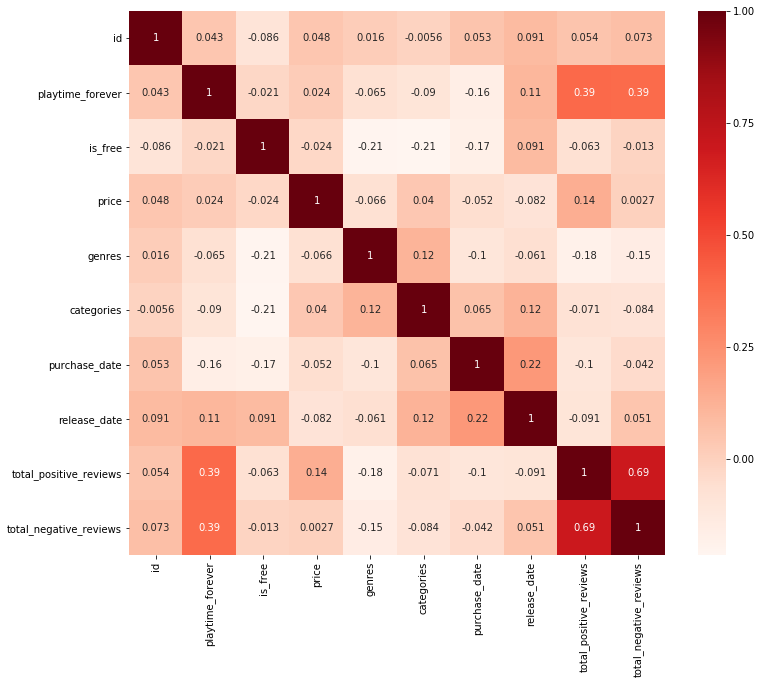

In [31]:
#Plot correlation matrix
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,10))
cor = train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

plt.savefig('datavis_2.png',bbox_inches='tight')
plt.show()



In [32]:

x_train=train[['total_positive_reviews','total_negative_reviews','release_date','purchase_date','categories','genres']]
y_train=train.iloc[:,1]

x_test=test[['total_positive_reviews','total_negative_reviews','release_date','purchase_date','categories','genres']]


In [33]:
###### train ########## 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


svr_rbf = SVR(kernel='rbf', C=1e2, gamma=0.1) 
svr_rbf.fit(x_train, y_train)
svm_confidence = svr_rbf.score(x_train, y_train)
print("svm_rbf confidence: ", svm_confidence)

# svr_poly = SVR(kernel='poly', C=3, gamma=0.1) 
# svr_poly.fit(x_train, y_train)
# svm_confidence = svr_poly.score(x_train, y_train)
# print("svm_poly confidence: ", svm_confidence)


lr = LinearRegression()
# Train the model
lr.fit(x_train, y_train)
lr_confidence = lr.score(x_train, y_train)
print("lr confidence: ", lr_confidence)


#rf = RandomForestRegressor(n_estimators =65, random_state =22)
rf = RandomForestRegressor(n_estimators =100, random_state = 42 )
# Train the model on training data
rf.fit(x_train, y_train)

print("RandomForestRegessor confidence: ", rf.score(x_train, y_train))


from sklearn.linear_model import Ridge
rr = Ridge(alpha=194)
rr.fit(x_train, y_train)

from sklearn.ensemble import GradientBoostingRegressor
GBoost = GradientBoostingRegressor(n_estimators=578,learning_rate=0.054,max_depth=10, max_features='sqrt'
                                  ,min_samples_leaf=15,min_samples_split=10,loss='huber',random_state =5)

GBoost.fit(x_train,y_train)
print("GB confidence: ",  GBoost.score(x_train, y_train))


from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor



AdaB= AdaBoostRegressor(DecisionTreeRegressor(max_depth=13),
                          n_estimators=100,random_state=42,loss ='square' )
AdaB.fit(x_train, y_train)
print("AdaBoostRegressor confidence: ",  AdaB.score(x_train, y_train))



clf = DecisionTreeRegressor(max_depth=13,random_state = 42)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)
print("clf confidence: ",  clf.score(x_train, y_train))



svm_rbf confidence:  0.9974136552442904
lr confidence:  0.22524879185267876
RandomForestRegessor confidence:  0.863418285249068
GB confidence:  0.2585173693805286
AdaBoostRegressor confidence:  0.9153669090784985
clf confidence:  0.9995626792293194


In [34]:

from sklearn.metrics import mean_squared_error
predictions =svr_rbf.predict(x_train)
print("svm_rbf mse: ", mean_squared_error(y_train,predictions))

predictions = lr.predict(x_train)
print("lr mse: ", mean_squared_error(y_train,predictions))

predictions = rr.predict(x_train)
print("rr mse: ", mean_squared_error(y_train,predictions))

predictions = GBoost.predict(x_train)
print("GBoost. mse: ", mean_squared_error(y_train,predictions))

predictions = AdaB.predict(x_train)
print("AdaB mse: ", mean_squared_error(y_train,predictions))

predictions = clf.predict(x_train)
print("clf mse: ", mean_squared_error(y_train,predictions))



svm_rbf mse:  0.3242804062714295
lr mse:  97.1396547125669
rr mse:  98.1844667125106
GBoost. mse:  92.96838256758808
AdaB mse:  10.611444219663174
clf mse:  0.05483203926087502


In [35]:
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeRegressor(random_state = 42)

parameters = {'max_depth':range(3,30)}
grid = GridSearchCV(clf, parameters, n_jobs=4,cv=3)
grid.fit(x_train, y_train)
tree_model = grid.best_estimator_
print (grid.best_score_, grid.best_params_) 

-0.19412096426356742 {'max_depth': 17}


In [36]:
#Create a  DataFrame with the passengers ids and our prediction regarding whether they survived or not
predictions = grid.predict(x_test)

submission = pd.DataFrame({'id':test['id'],'playtime_forever':predictions})

#Visualize the first 5 rows
submission.head(50)



filename = 'test_submission.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: test_submission.csv


In [38]:
#submission.head(50)